In [1]:
# Load the packages
library(fUnitRoots)
library(zoo)
library(tseries)
library(forecast)
library(readr)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
path <- "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE"
setwd(path)
getwd() 
list.files() 

[1] "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE"

[1] "AR(1).R"                   "CVSCJO.csv"               
 [3] "Code.R"                    "Pistes_Statapp"           
 [5] "README.md"                 "Untitled-.ipynb"          
 [7] "alimentation_sans_covid.R" "box-jenkins.R"            
 [9] "build"                     "test.R"                   
[11] "test.ipynb"

In [8]:
path_donnees <- "/Users/nayelbenabdesadok/GitProjects/Time_Series_ENSAE/CVSCJO.csv"
df <- read_csv2(path_donnees, show_col_types = FALSE)


i Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



In [14]:
data_all=data[4:425,]
data_all$Codes<-NULL
colnames(data_all)=c("Date_MY","IPI")
data_all$Date<-as.Date(paste(data_all$Date_MY,1,sep="-"), format = "%Y-%m-%d")
data_all$Date_MY<-NULL

In [15]:
data_all

IPI,Date
<chr>,<date>
105.57,2025-02-01
108.68,2025-01-01
122.85,2024-12-01
107.97,2024-11-01
106.18,2024-10-01
100.47,2024-09-01
85.7,2024-08-01
95.57,2024-07-01
101.11,2024-06-01


In [16]:
# Extracting month and year from date 
Year=as.numeric(format(data_all$Date, format = "%Y"))
Month=format(data_all$Date, format = "%m")
data_all=cbind(data_all,Year,Month)
data_all$Year<-as.numeric(data_all$Year)
data_all$IPI<-as.numeric(data_all$IPI)
sort(data_all$IPI)
data_all<-data_all[order(data_all$Date),] 
rownames(data_all) <- seq(length=nrow(data_all)) 

[1]  61.14  61.70  65.42  68.14  69.05  71.76  72.78  75.63  76.27  76.96
 [11]  77.04  77.86  78.20  78.27  78.57  78.64  78.82  79.05  79.22  79.31
 [21]  79.47  79.62  79.64  79.69  79.71  79.73  79.80  79.88  79.90  79.92
 [31]  79.97  79.97  79.99  80.01  80.04  80.05  80.27  80.27  80.27  80.28
 [41]  80.32  80.34  80.39  80.45  80.55  80.56  80.63  80.63  80.72  80.72
 [51]  80.72  80.77  80.85  80.90  80.93  80.96  80.99  80.99  81.11  81.14
 [61]  81.21  81.22  81.26  81.36  81.38  81.48  81.50  81.57  81.65  81.71
 [71]  81.72  81.72  81.76  81.90  81.91  81.97  82.11  82.22  82.40  82.46
 [81]  82.49  82.66  82.97  82.97  83.02  83.15  83.30  83.40  83.41  84.09
 [91]  84.14  84.19  84.30  84.34  84.39  84.44  84.47  84.48  84.49  84.54
[101]  84.58  84.60  84.65  84.75  84.80  84.85  84.88  84.88  84.89  84.91
[111]  84.91  85.00  85.05  85.12  85.15  85.16  85.19  85.21  85.22  85.26
[121]  85.26  85.30  85.31  85.33  85.42  85.65  85.70  85.75  85.92  86.21
[131]  86.24  86.31  86.31  86.32  86.42  86.49  86.59  86.62  86.70  86.70
[141]  86.71  87.13  87.23  87.25  87.41  87.88  87.94  88.08  88.13  88.19
[151]  88.29  88.44  88.45  88.60  88.61  88.69  88.78  89.02  89.06  89.06
[161]  89.11  89.15  89.30  89.32  89.33  89.35  89.39  89.43  89.49  89.56
[171]  89.58  89.66  89.70  89.76  89.78  89.79  89.81  89.94  90.08  90.09
[181]  90.09  90.09  90.25  90.25  90.36  90.55  90.59  90.60  90.67  90.70
[191]  90.75  90.76  90.83  90.90  90.94  90.97  91.02  91.12  91.13  91.14
[201]  91.18  91.29  91.30  91.32  91.33  91.39  91.47  91.50  91.50  91.56
[211]  91.59  91.67  91.88  91.89  91.90  91.92  91.94  91.97  92.01  92.04
[221]  92.07  92.13  92.24  92.24  92.26  92.26  92.28  92.34  92.34  92.37
[231]  92.38  92.42  92.43  92.51  92.55  92.58  92.61  92.61  92.69  92.70
[241]  92.75  92.76  92.81  92.91  92.92  92.96  92.99  93.00  93.00  93.06
[251]  93.06  93.08  93.10  93.11  93.12  93.17  93.17  93.19  93.20  93.21
[261]  93.25  93.27  93.28  93.32  93.33  93.34  93.37  93.37  93.38  93.41
[271]  93.48  93.49  93.54  93.56  93.58  93.59  93.61  93.64  93.65  93.66
[281]  93.67  93.69  93.70  93.73  93.73  93.74  93.78  93.80  93.84  93.87
[291]  93.88  94.13  94.24  94.25  94.25  94.26  94.32  94.32  94.34  94.45
[301]  94.48  94.50  94.53  94.61  94.64  94.66  94.71  94.71  94.72  94.75
[311]  94.90  94.92  94.96  95.03  95.11  95.11  95.17  95.27  95.32  95.35
[321]  95.57  95.76  95.83  95.84  95.99  96.21  96.75  96.76  96.88  97.06
[331]  97.25  97.26  97.44  97.52  97.60  97.66  97.69  97.76  97.83  97.91
[341]  98.05  98.11  98.34  98.46  98.63  99.12  99.21  99.63  99.66  99.69
[351]  99.77  99.79  99.93 100.12 100.12 100.47 100.53 100.76 100.91 101.04
[361] 101.11 101.19 101.22 101.31 101.45 101.49 101.59 101.62 101.71 101.71
[371] 102.06 102.06 102.09 102.58 102.94 102.97 103.01 103.03 103.40 103.98
[381] 104.02 104.57 104.60 104.79 104.79 105.04 105.07 105.31 105.31 105.57
[391] 105.74 106.18 106.45 106.86 107.04 107.04 107.34 107.52 107.57 107.97
[401] 108.05 108.34 108.56 108.63 108.68 109.52 109.61 109.69 109.74 110.06
[411] 112.91 113.02 113.28 113.98 116.60 117.27 117.28 118.33 120.11 122.85
[421] 126.28 128.32

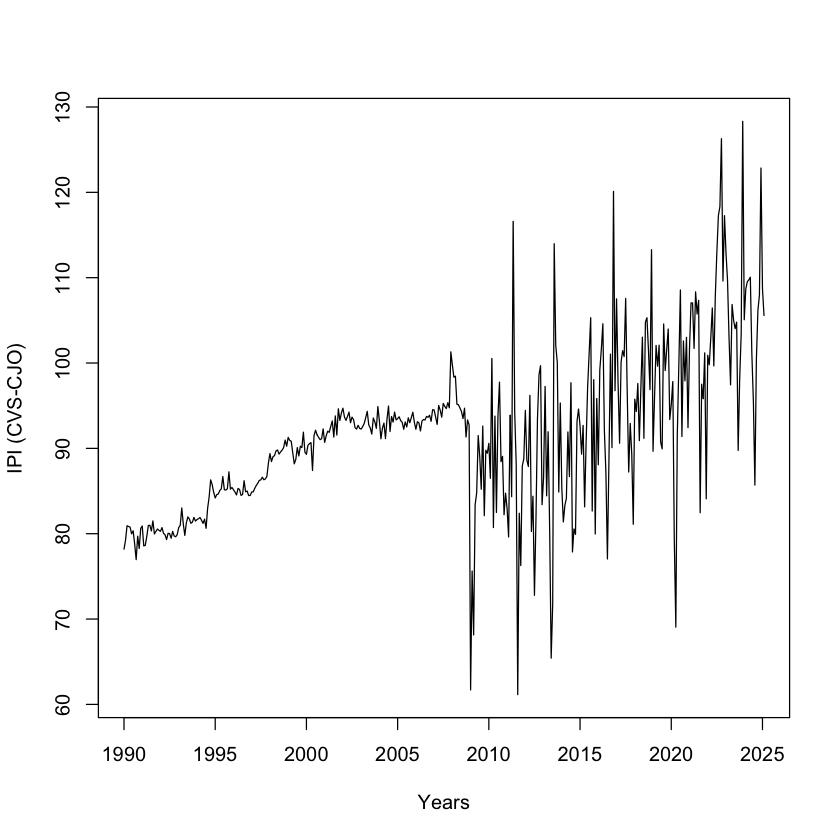

In [17]:
# Create a time series for easier analysis, and plot
Xt.ts<-ts(data_all$IPI,start=c(1990,1), end=c(2025,2), frequency=12)
par(mfrow=c(1,1))
plot.ts(Xt.ts, xlab="Years", ylab="IPI (CVS-CJO)")

In [18]:
# As we find a noticeable change in the data before and after January 2009,
# We split the data into two subsets of the time series
Xt1 <- window(Xt.ts, end=c(2008, 12))
Xt2 <- window(Xt.ts, start=c(2009, 1))

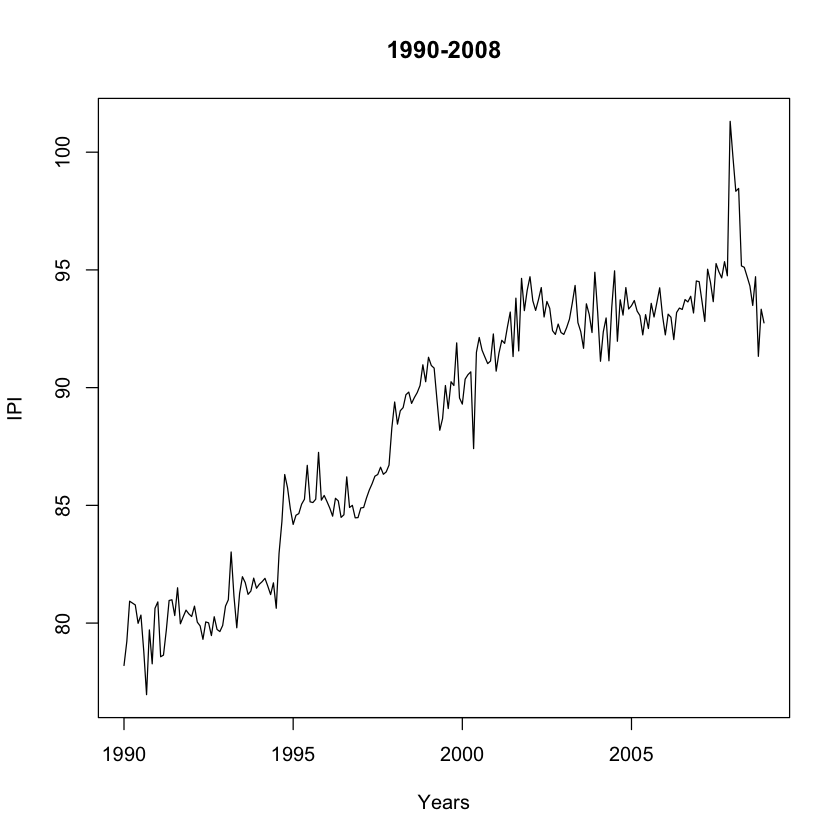

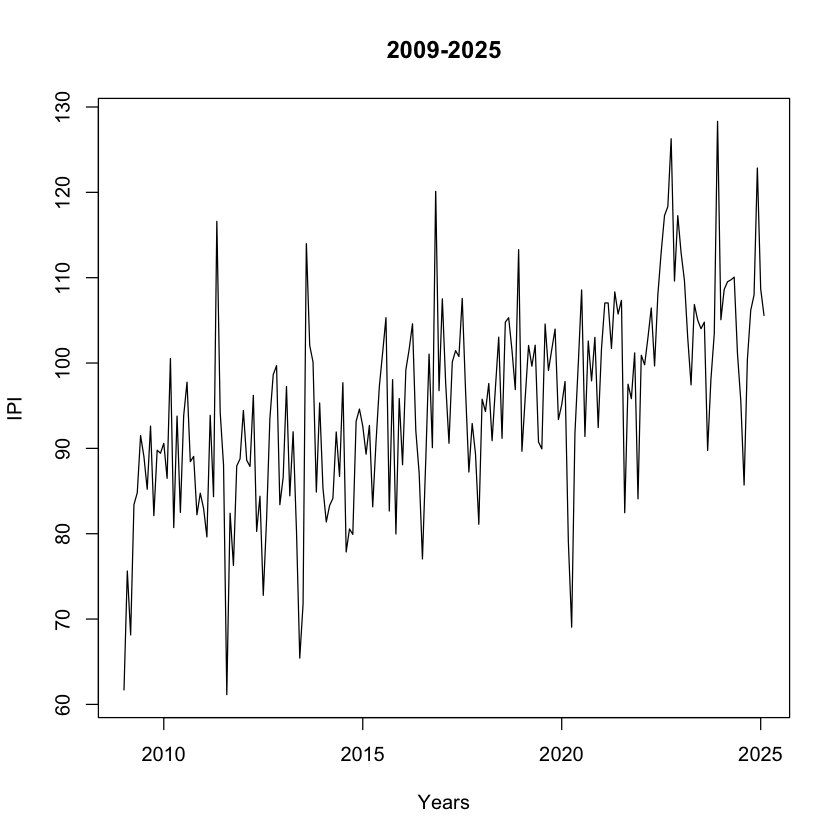

In [19]:
# And plot them
plot.ts(Xt1, xlab="Years", ylab="IPI",main="1990-2008")
plot.ts(Xt2, xlab="Years", ylab="IPI",main="2009-2025")